## Spatial and temporal correlation analysis between VIs and SPIs
### We will use the pearsonr and spearmanr functions from SciPy to calculate the correlation between EVI(NDVI) and SPIs in the timeseries for each pixel.

In [1]:
import xarray as xr
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn

%matplotlib inline
seaborn.set_style('dark')
from scipy import stats

from scipy.stats import linregress, pearsonr, spearmanr



In [2]:
spi_6M= xr.open_dataarray('/g/data/oe9/project/team-drip/Rainfall/SPI_awap/SPI_6M_masked.nc')
spi_6M_sub=spi_6M.isel(time=range(1,204))
spi_6M_sub

<xarray.DataArray 'SPI_6M' (latitude: 263, longitude: 280, time: 203)>
[14948920 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float64 -24.55 -24.6 -24.65 -24.7 -24.75 -24.8 ...
  * longitude  (longitude) float64 138.5 138.6 138.6 138.7 138.7 138.8 138.8 ...
  * time       (time) datetime64[ns] 2000-02-01 2000-03-01 2000-04-01 ...

In [3]:
coarse_NDVI= xr.open_dataarray('/g/data/oe9/project/team-drip/resampled_NDVI/coarse_NDVI.nc')
coarse_NDVI

<xarray.DataArray 'ndvi' (latitude: 263, longitude: 280, time: 203)>
[14948920 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float64 -24.55 -24.6 -24.65 -24.7 -24.75 -24.8 ...
  * longitude  (longitude) float64 138.5 138.6 138.6 138.7 138.7 138.8 138.8 ...
  * time       (time) datetime64[ns] 2000-02-01 2000-03-01 2000-04-01 ...

In [4]:
climatology = coarse_NDVI.groupby('time.month').mean('time')

anomalies_NDVI = coarse_NDVI.groupby('time.month') - climatology


In [5]:
anomalies_NDVI

<xarray.DataArray 'ndvi' (latitude: 263, longitude: 280, time: 203)>
array([[[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       ..., 
       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]])
Coordinates:
  * latitude   (latitude) float64 -24.55 -24.6 -24.65 -24.7 -24.75 -24.8 ...
  * longitude  (longitude) float64 138.5 138.6 138.6 138.7 138.7 138.8 138.8 ...
  * time       (time) datetime64[ns] 2000-02-01 2000-03-01 

In [6]:
# Start by setting up a new dataset, with empty arrays along latitude and longitude
dims = ('latitude', 'longitude')
coords = {d: spi_6M_sub[d] for d in dims}
correlation_data = {
    name: xr.DataArray(data=np.ndarray([len(spi_6M[d]) for d in dims]),
                       name=name, dims=dims)
    for name in 'pearson_r pearson_p spearman_r spearman_p'.split()
}
corr_6M = xr.Dataset(data_vars=correlation_data, coords=coords)
corr_6M
corr_6M_ndvi = xr.Dataset(data_vars=correlation_data, coords=coords)
corr_6M_ndvi


<xarray.Dataset>
Dimensions:     (latitude: 263, longitude: 280)
Coordinates:
  * latitude    (latitude) float64 -24.55 -24.6 -24.65 -24.7 -24.75 -24.8 ...
  * longitude   (longitude) float64 138.5 138.6 138.6 138.7 138.7 138.8 ...
Data variables:
    pearson_r   (latitude, longitude) float64 6.937e-310 6.937e-310 ...
    pearson_p   (latitude, longitude) float64 6.937e-310 6.937e-310 0.0 0.0 ...
    spearman_r  (latitude, longitude) float64 6.937e-310 6.937e-310 ...
    spearman_p  (latitude, longitude) float64 nan nan nan nan nan nan nan ...

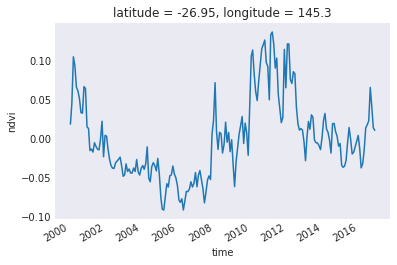

In [54]:
Lat= -26.95 
Long= 145.3
NDVI = anomalies_NDVI.sel(latitude=Lat, longitude=Long)
NDVI.plot()
# spi_24M_sub.sel(latitude=100, longitude=100)

<xarray.DataArray 'SPI_6M' (time: 203)>
array([ 0.24046 ,  1.25917 ,  1.543317, ...,  2.130452,  0.178034, -0.00218 ])
Coordinates:
    latitude   float64 -26.95
    longitude  float64 145.3
  * time       (time) datetime64[ns] 2000-02-01 2000-03-01 2000-04-01 ...

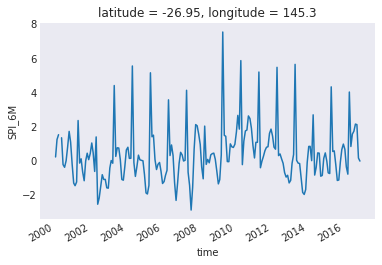

In [55]:
SPI = spi_6M_sub.sel(latitude=Lat, longitude=Long)
SPI.plot()
SPI

In [57]:
pearsonr(NDVI,SPI)


/g/data/oe9/software/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:3018: RuntimeWarning: invalid value encountered in subtract
  xm, ym = x - mx, y - my


(nan, 1.0)

In [65]:
mask = ~np.isinf(SPI)
mask

<xarray.DataArray 'SPI_6M' (time: 203)>
array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)
Coordinates:
    latitude   float64 -26.95
    longitude  float64 145.3
  * time       (time) datetime64[ns] 2000-02-01 2000-03-01 2000-04-01 ...

In [68]:
subset_SPI= SPI.where(mask, drop=True)
subset_SPI

<xarray.DataArray 'SPI_6M' (time: 202)>
array([ 0.24046 ,  1.25917 ,  1.543317, ...,  2.130452,  0.178034, -0.00218 ])
Coordinates:
    latitude   float64 -26.95
    longitude  float64 145.3
  * time       (time) datetime64[ns] 2000-02-01 2000-03-01 2000-04-01 ...

In [69]:
subset_NDVI= NDVI.where(mask, drop=True)
subset_NDVI

<xarray.DataArray (time: 202)>
array([ 0.018593,  0.045186,  0.105113, ...,  0.041451,  0.01395 ,  0.010628])
Coordinates:
    latitude   float64 -26.95
    longitude  float64 145.3
  * time       (time) datetime64[ns] 2000-02-01 2000-03-01 2000-04-01 ...
    month      (time) int64 2 3 4 6 7 8 9 10 11 12 1 2 3 4 5 6 7 8 9 10 11 ...

In [24]:
NDVI.dropna(dim='time')

<xarray.DataArray 'ndvi' (time: 203)>
array([ 0.076954,  0.175864,  0.223345, ...,  0.189619,  0.076817,  0.042422])
Coordinates:
    latitude   float64 -32.55
    longitude  float64 146.5
  * time       (time) datetime64[ns] 2000-02-01 2000-03-01 2000-04-01 ...
    month      (time) int64 2 3 4 5 6 7 8 9 10 11 12 1 2 3 4 5 6 7 8 9 10 11 ...

In [25]:
SPI.dropna(dim='time')

<xarray.DataArray 'SPI_6M' (time: 203)>
array([ 0.726998,  1.169759,  1.541741, ...,  1.326499,  0.556794,  0.435882])
Coordinates:
    latitude   float64 -32.55
    longitude  float64 146.5
  * time       (time) datetime64[ns] 2000-02-01 2000-03-01 2000-04-01 ...

In [70]:
 pearsonr(subset_NDVI,subset_SPI)

(0.36154902184326454, 1.245984091193868e-07)

In [72]:
%%time
# By looping, we make a list of lists of correlations
latout = []
for lat in anomalies_NDVI.latitude:
    lonout = []
    latout.append(lonout)
    for lon in anomalies_NDVI.longitude:
        NDVI = anomalies_NDVI.sel(latitude=lat, longitude=lon)
        SPI = spi_6M_sub.sel(latitude=lat, longitude=lon)
        mask = ~np.isinf(SPI)
        subset_NDVI= NDVI.where(mask, drop=True)
        subset_SPI= SPI.where(mask, drop=True)
        
        val = pearsonr(subset_NDVI,subset_SPI)
        try:
            # Spearman's R can fail for some values
            val += spearmanr(subset_NDVI,subset_SPI)
        except ValueError:
            val += (np.nan, np.nan)
        lonout.append(val)
        
# Then we convert the lists to an array
arr = np.array(latout)
# And finally insert the pieces into our correlation dataset
corr_6M.pearson_r[:] = arr[..., 0]
corr_6M.pearson_p[:] = arr[..., 1]
corr_6M.spearman_r[:] = arr[..., 2]
corr_6M.spearman_p[:] = arr[..., 3]

/g/data/oe9/software/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/g/data/oe9/software/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/g/data/oe9/software/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/g/data/oe9/software/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/g/data/oe9/software/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/g/data/oe9/software/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning:

CPU times: user 10min 14s, sys: 130 ms, total: 10min 14s
Wall time: 10min 14s


In [8]:
%%time
# By looping, we make a list of lists of correlations
latout = []
for lat in coarse_NDVI.latitude:
    lonout = []
    latout.append(lonout)
    for lon in coarse_NDVI.longitude:
        val = pearsonr(
            coarse_NDVI.sel(latitude=lat, longitude=lon),
            spi_6M_sub.sel(latitude=lat, longitude=lon)
        )
        try:
            # Spearman's R can fail for some values
            val += spearmanr(
                coarse_NDVI.sel(latitude=lat, longitude=lon),
                spi_6M_sub.sel(latitude=lat, longitude=lon)
            )
        except ValueError:
            val += (np.nan, np.nan)
        lonout.append(val)
# Then we convert the lists to an array
arr = np.array(latout)
# And finally insert the pieces into our correlation dataset
corr_6M_ndvi.pearson_r[:] = arr[..., 0]
corr_6M_ndvi.pearson_p[:] = arr[..., 1]
corr_6M_ndvi.spearman_r[:] = arr[..., 2]
corr_6M_ndvi.spearman_p[:] = arr[..., 3]

/g/data/oe9/software/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:3018: RuntimeWarning: invalid value encountered in subtract
  xm, ym = x - mx, y - my
/g/data/oe9/software/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/g/data/oe9/software/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/g/data/oe9/software/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/g/data/oe9/software/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/g/data/oe9/software/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encounte

CPU times: user 7min 54s, sys: 158 ms, total: 7min 54s
Wall time: 7min 54s


<xarray.DataArray 'pearson_r' ()>
array(0.5215352178816783)

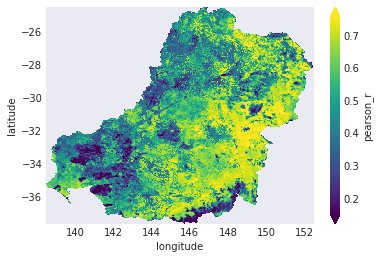

In [75]:
corr_6M.pearson_r.plot.imshow(robust=True)
corr_6M.pearson_r.mean()

<xarray.DataArray ()>
array(0.5289734529722925)

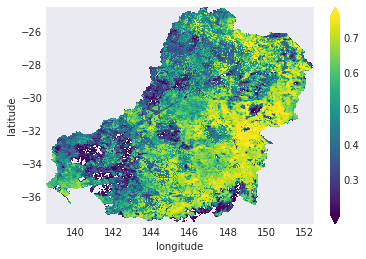

In [74]:
corr_6M.pearson_r.where(corr_6M.pearson_p < 0.05).plot.imshow(robust=True)
corr_6M.pearson_r.where(corr_6M.pearson_p < 0.05).mean()

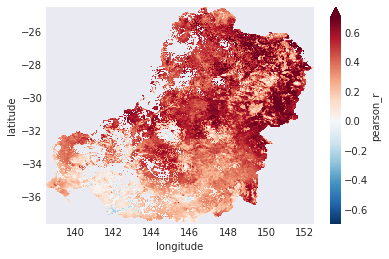

In [52]:
corr_6M.pearson_r.plot.imshow(robust=True)


<xarray.DataArray ()>
array(0.5289734529722925)

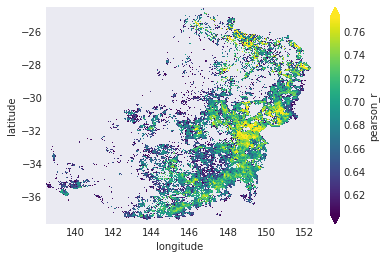

In [78]:
SIGNIFICANT = 0.05  # Choose your own!
corr_6M.pearson_r.where(corr_6M.pearson_r > 0.6).plot.imshow(robust=True)
corr_6M.pearson_r.where(corr_6M.pearson_p < 0.05).mean()

<xarray.DataArray ()>
array(0.43012873232196197)

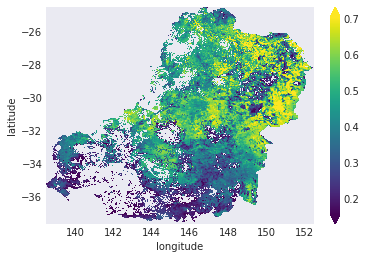

In [12]:
corr_6M_ndvi.pearson_r.where(corr_6M_ndvi.pearson_p < 0.05).plot.imshow(robust=True)
corr_6M_ndvi.pearson_r.where(corr_6M_ndvi.pearson_p < 0.05).mean()

In [79]:
# SAVE corelation matrix
path = '/g/data/oe9/project/team-drip/Spatial_temporal_correlation/SPI_NDVI/NDVI_SPI6M_Correlation.nc'
corr_6M.to_netcdf(path,mode = 'w')